In [1]:
!pip3 install matplotlib
import numpy as np
import matplotlib.pyplot as plt
import os
from IPython import display
import matplotlib
import math
%matplotlib inline
matplotlib.rcParams.update(matplotlib.rcParamsDefault)


In [2]:
# infile = open('/home/hu/Desktop/memory_file_sys/lidar_log_20230403_141445.txt', 'r')
# dist_list = []
# for l in infile:
#     l.split(" ")
#     print(type(l), l)
#     tmp = float(l[2])
#     if tmp < 3000:
#         dist_list.append(tmp)

# # print(dist_list
# #
# #  )
# plt.plot(list(range(500)), dist_list[:500])
# plt.plot(list(range(500)), [500 for _ in range(500)])
# plt.show()

In [3]:

def theta2xy(theta, dist):
    return dist * math.cos(theta / 360 * math.pi * 2), dist * math.sin(theta / 360 * math.pi * 2)


def show_frames(frames, radius=4000):
    plt.figure(figsize=(20, 20))
    for frame_index in range(frames.__len__()):
        plt.cla()  # 清除图片 
        
        
        cur_frame = frames[frame_index]
        plt.cla()
        cordinates = np.array([theta2xy(f[1], f[2]) for f in cur_frame])
        # print(cordinates.shape)
        # print(cordinates[:2])
        plt.scatter(cordinates[:, 0], cordinates[:, 1], s = 2)
        # plt.plot(cordinates)
        plt.grid('on')
        plt.xlim([-radius, radius])
        plt.ylim([-radius, radius])
        display.clear_output(wait=True)
        plt.pause(0.00000001) 
    plt.show()


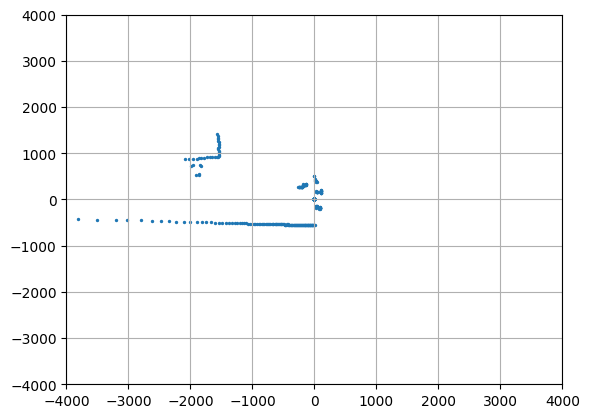

In [15]:
frames, points = [], []
infile = open('/home/hu/Desktop/memory_file_sys/lidar_log/20230424_094023.txt', 'r')
infile.readline()
for i, line in enumerate(infile):
    if line[0] not in [str(_) for _ in range(10)]:
        continue
    line_info = line.split()
    # print(line_info)s
    points.append([float(x) for x in line_info])
    if i != 0 and line_info[0] == '1':
        frames.append(points)
        points = []
frames = frames[-500:]
print(frames.__len__())
show_frames(frames)

In [10]:

MIN_TARGET_ANGLE, MAX_TARGET_ANGLE = 170, 190
target_dist_list = []
for f in frames:
    target_cnt, target_dist = 0, 0
    for p in f:
        if(p[3] != 0 and p[1] <= MAX_TARGET_ANGLE and p[1] >= MIN_TARGET_ANGLE):
            target_cnt += 1
            target_dist += p[2]
    if target_cnt != 0:
        target_dist /= target_cnt
        target_dist_list.append(target_dist)
        print(f'target_dist: {target_dist}, target_cnt: {target_cnt}')
    else:
        print('target missed!')



target_dist: 4386.3, target_cnt: 10
target_dist: 4073.3333333333335, target_cnt: 9
target_dist: 6029.363636363636, target_cnt: 11
target_dist: 6139.818181818182, target_cnt: 11
target_dist: 3976.5555555555557, target_cnt: 9
target_dist: 3099.0, target_cnt: 3
target_dist: 3322.25, target_cnt: 4
target_dist: 4029.0, target_cnt: 9
target_dist: 4066.1111111111113, target_cnt: 9
target_dist: 3797.125, target_cnt: 8
target_dist: 3784.0, target_cnt: 8
target_dist: 4092.7, target_cnt: 10
target_dist: 4423.1, target_cnt: 10
target_dist: 4344.4, target_cnt: 10
target_dist: 4015.4444444444443, target_cnt: 9
target_dist: 4073.6666666666665, target_cnt: 9
target_dist: 4081.0, target_cnt: 10
target_dist: 4044.5, target_cnt: 10
target_dist: 4041.777777777778, target_cnt: 9
target_dist: 4073.5, target_cnt: 10
target_dist: 3990.4444444444443, target_cnt: 9
target_dist: 3973.1111111111113, target_cnt: 9
target_dist: 4182.6, target_cnt: 10
target_dist: 3958.1111111111113, target_cnt: 9
target_dist: 4072.

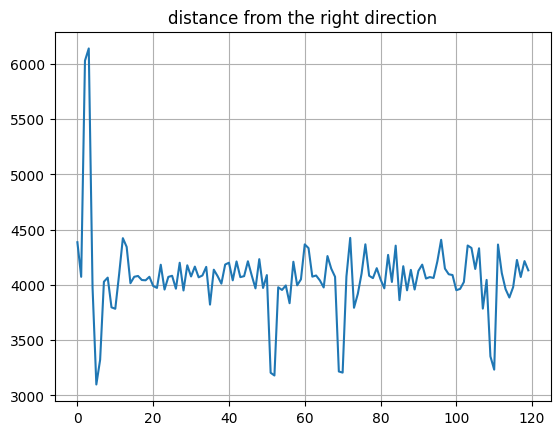

In [11]:
plt.plot(list(range(target_dist_list.__len__())), target_dist_list,)
plt.grid()
plt.title('distance from the right direction')
plt.show()

In [ ]:
show_frames(frames)

KeyboardInterrupt: 